In [1]:
install.packages('foreign')

Installing package into 'C:/Users/205/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'foreign' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\205\AppData\Local\Temp\RtmpCo0mVA\downloaded_packages


In [2]:
library(foreign)

In [4]:
library(dplyr)

In [6]:
library(ggplot2)

In [7]:
library(readxl)

In [9]:
## 데이터 적재
raw_welfare <- read.spss(file = '../jupyter_R/lecture/RMD/Koweps_hpc10_2015_beta1.sav', 
                         to.data.frame=T)

Warning message in read.spss(file = "../jupyter_R/lecture/RMD/Koweps_hpc10_2015_beta1.sav", :
"../jupyter_R/lecture/RMD/Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"


In [10]:
## 데이터 복사
welfare <- raw_welfare

In [11]:
head(welfare)
tail(welfare)

,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,⋯,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,10101,0,NA,1,1,864,864,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,2,1,1,20101,0,NA,1,1,600,600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,3,1,1,30101,0,NA,1,1,1571,1619,⋯,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
5,4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,6,1,1,60101,0,NA,1,1,3030,3486,⋯,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,⋯,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16659,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,NA,7163,0,NA
16660,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16661,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,3630,NA,NA,0,NA
16662,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,700,NA,0,NA
16663,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16664,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA


In [13]:
## jupyter에서 지원안함.
View(welfare)

ERROR: Error in View(welfare): 'View()' not yet supported in the Jupyter R kernel


In [ ]:
dim(welfare)
str(welfare)

In [12]:
summary(welfare)

     h10_id        h10_ind           h10_sn        h10_merkey      
 Min.   :   1   Min.   : 1.000   Min.   :1.000   Min.   :   10101  
 1st Qu.:2361   1st Qu.: 1.000   1st Qu.:1.000   1st Qu.:23612601  
 Median :4503   Median : 1.000   Median :1.000   Median :45030401  
 Mean   :4669   Mean   : 2.612   Mean   :1.003   Mean   :46689252  
 3rd Qu.:6613   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:66130501  
 Max.   :9800   Max.   :10.000   Max.   :9.000   Max.   :98000701  
                                                                   
     h_new           h10_cobf        h10_reg5        h10_reg7    
 Min.   :0.0000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :0.0000   Median :1.000   Median :3.000   Median :3.000  
 Mean   :0.2009   Mean   :2.213   Mean   :2.641   Mean   :3.705  
 3rd Qu.:0.0000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:6.000  
 Max.   :1.0000   Max.   :7.000   Max.   :5.000   Max.   :7.

In [13]:
## 컬럼명 바꾸기
welfare <- rename(welfare,
                 sex = h10_g3,
                 birth = h10_g4,
                 marriage = h10_g10,
                 religion = h10_g11,
                 income = p1002_8aq1,
                 code_job = h10_eco9,
                 code_region = h10_reg7)

In [14]:
head(welfare)

,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,code_region,h10_din,h10_cin,⋯,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,10101,0,NA,1,1,864,864,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,2,1,1,20101,0,NA,1,1,600,600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,3,1,1,30101,0,NA,1,1,1571,1619,⋯,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
5,4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,6,1,1,60101,0,NA,1,1,3030,3486,⋯,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


##### 데이터 분석 절차
- 1단계 : 변수 검토, 전처리
- 2단계 : 변수 간 관계 분석

### 1. 성별에 따른 월급 차이 

In [62]:
## 변수 검토
class(welfare$sex)
table(welfare$sex)

[1] "numeric"


   1    2 
7578 9086 

In [63]:
## 변수 전처리
## welfare$sex가 9이면 NA로 바꾸기, welfare$sex에서 데이터 찾아서
welfare$sex <- ifelse(welfare$sex == 9, NA, welfare$sex)

In [64]:
## 확인
table(is.na(welfare$sex))


FALSE 
16664 

In [65]:
## 성별 항목 이름부여
welfare$sex <- ifelse(welfare$sex == 1, 'male', 'female')
table(welfare$sex)


female   male 
  9086   7578 

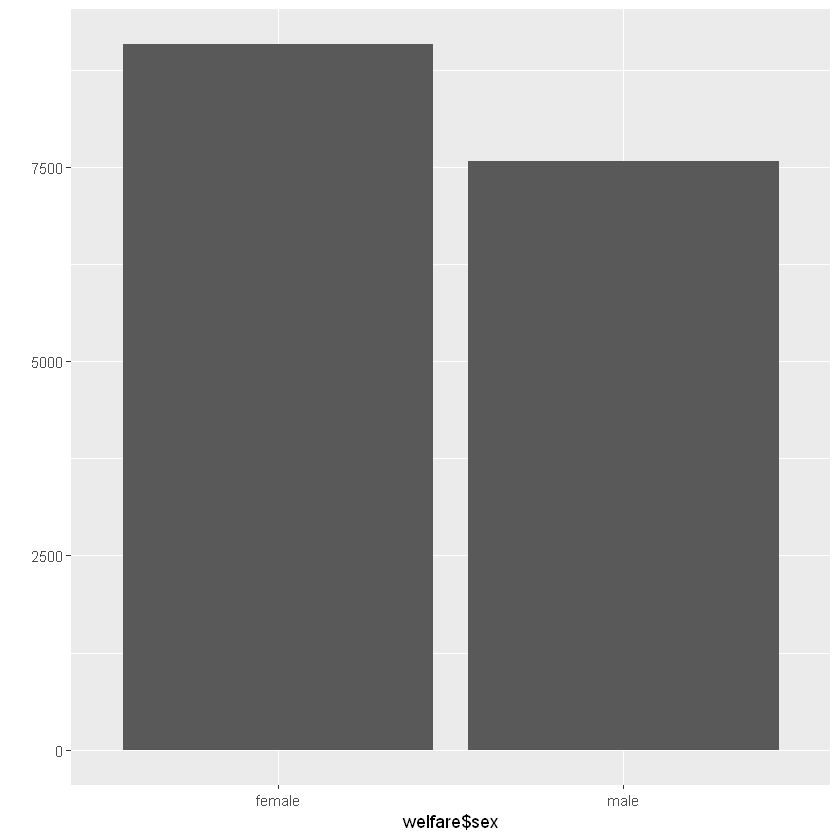

In [66]:
qplot(welfare$sex)

- 월급 변수 검토

In [25]:
class(welfare$income)
summary(welfare$income)

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 12030 rows containing non-finite values (stat_bin)."


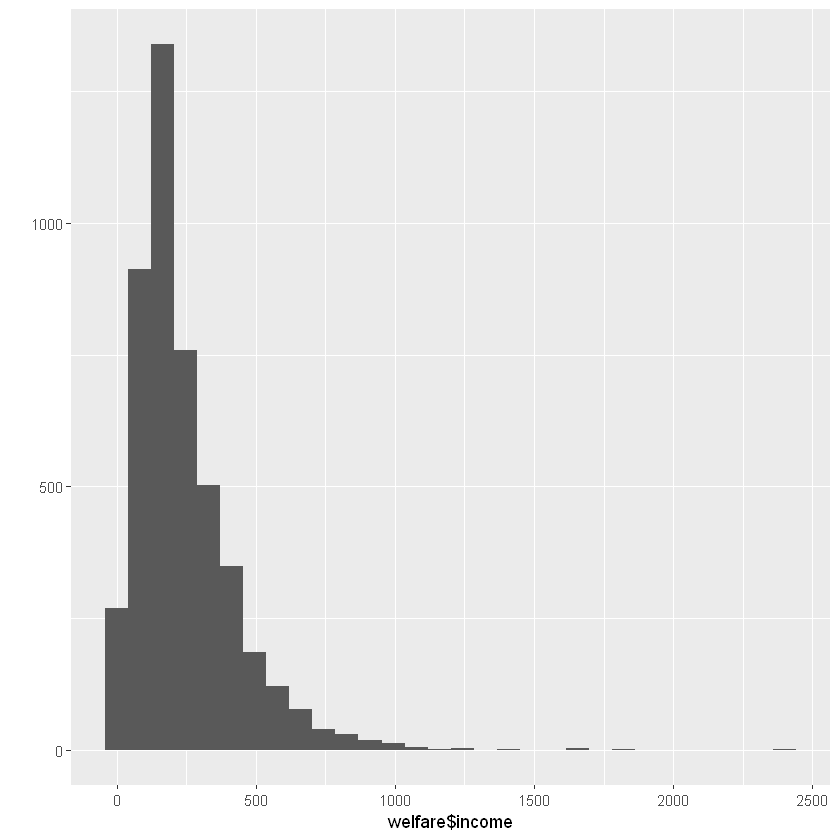

In [26]:
qplot(welfare$income)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 12051 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


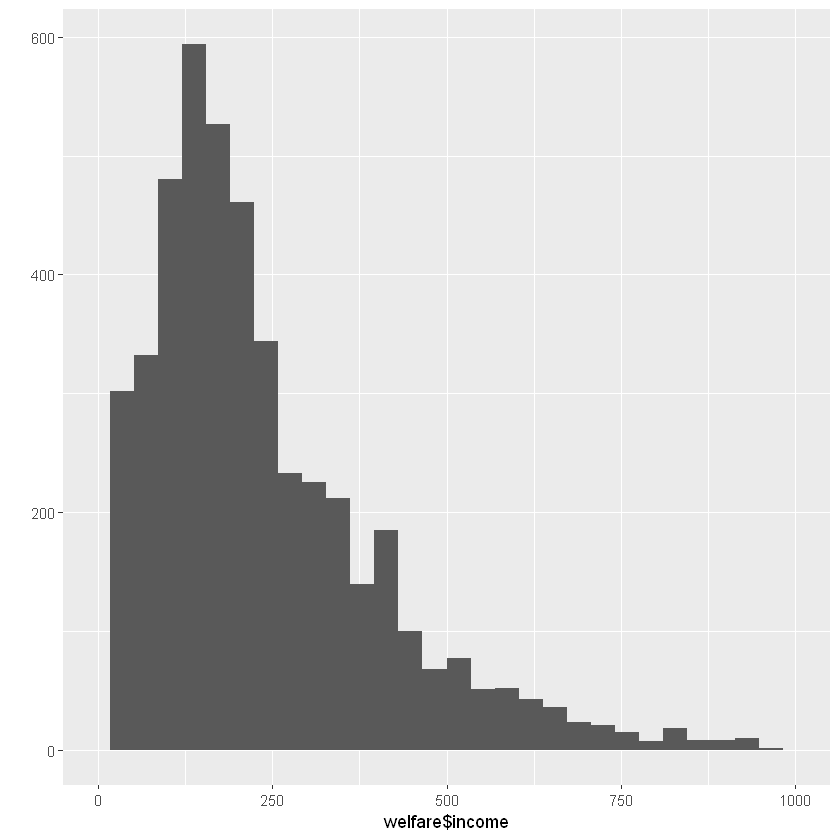

In [28]:
qplot(welfare$income) + xlim(0,1000)

- 월급변수 전처리

In [67]:
welfare$income <- ifelse(welfare$income %in% c(0,9999), NA, welfare$income)

In [68]:
table(is.na(welfare$income))


FALSE  TRUE 
 4620 12044 

- 성별에 따른 월급 차이 분석하기 

In [69]:
## 성별 월급 평균표 만들기
sex_income <- welfare %>% 
filter(!is.na(income)) %>% 
group_by(sex) %>% 
summarise(mean_income = mean(income))

sex_income

`summarise()` ungrouping output (override with `.groups` argument)



sex,mean_income
<chr>,<dbl>
female,163.2471
male,312.2932


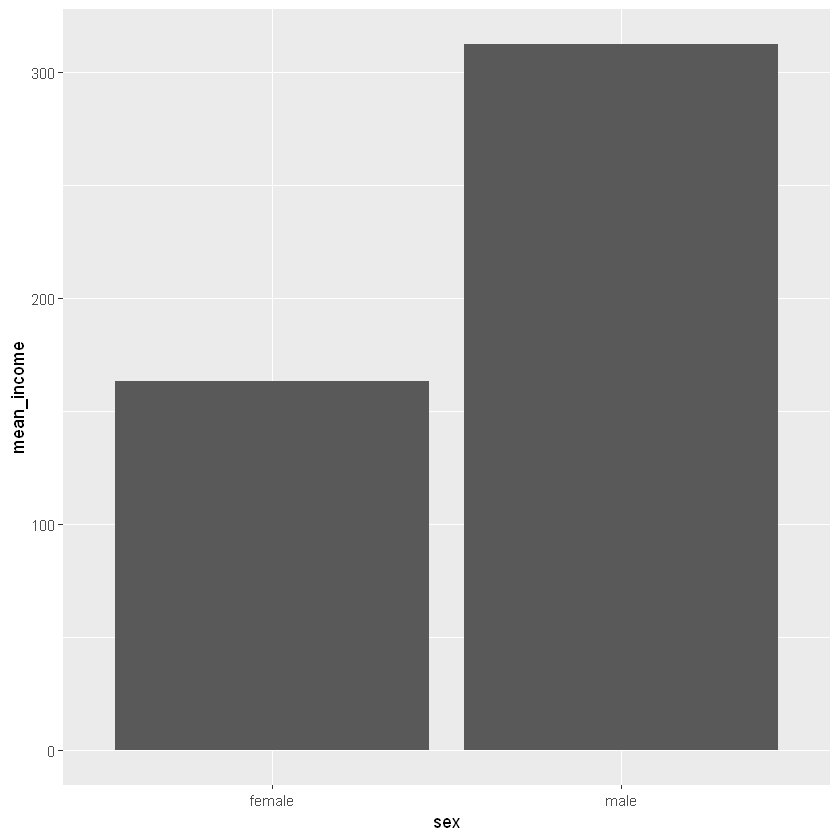

In [32]:
ggplot(data = sex_income, aes(x=sex, y=mean_income))+geom_col()

### 2. 연령별 월급

In [15]:
## 변수 검토하기 - 나이, 월급
class(welfare$birth)
summary(welfare$birth)

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



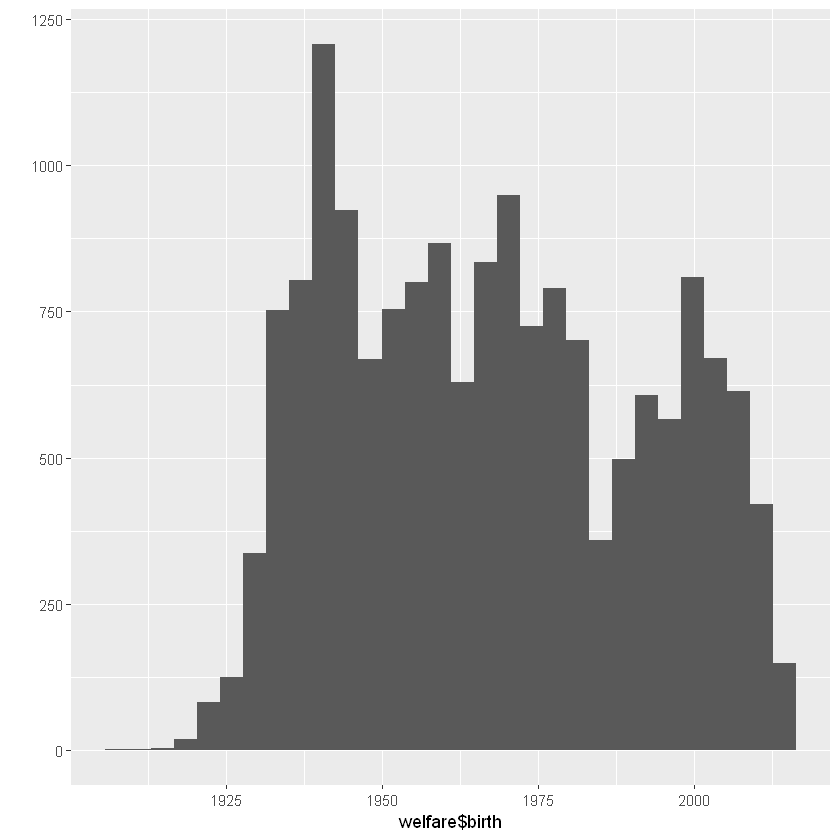

In [16]:
qplot(welfare$birth)

In [17]:
## 결측치 확인
table(is.na(welfare$birth))


FALSE 
16664 

In [18]:
## 이상치 결측 처리
welfare$birth <- ifelse(welfare$birth == 9999, NA, welfare$birth)
table(is.na(welfare$birth))


FALSE 
16664 

In [19]:
welfare$age <- 2015 - welfare$birth +1
summary(welfare$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   28.00   50.00   48.43   70.00  109.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



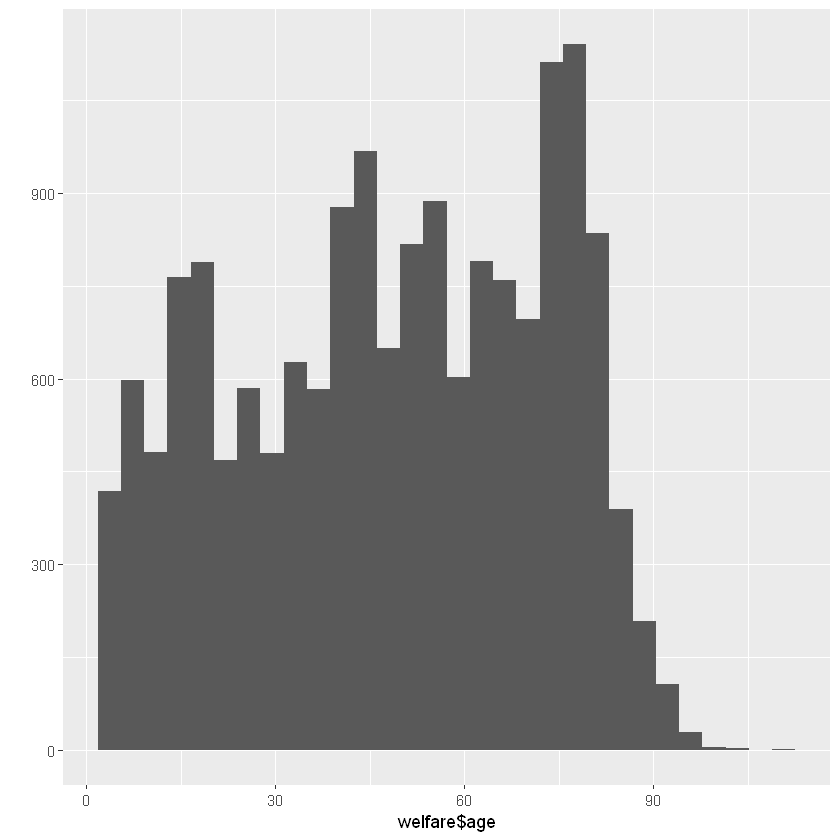

In [20]:
qplot(welfare$age)

In [21]:
age_income <- welfare %>% 
filter(!is.na(income)) %>% 
group_by(age) %>% 
summarise(mean_income = mean(income))

age_income

`summarise()` ungrouping output (override with `.groups` argument)



age,mean_income
<dbl>,<dbl>
20,121.3000
21,105.5185
22,130.0923
23,141.7157
24,134.0877
25,144.6559
26,157.7284
27,188.2451
28,204.7289


In [44]:
summary(age_income)

      age         mean_income    
 Min.   :20.00   Min.   : 15.00  
 1st Qu.:37.00   1st Qu.: 98.05  
 Median :54.00   Median :188.25  
 Mean   :54.04   Mean   :177.25  
 3rd Qu.:71.00   3rd Qu.:284.87  
 Max.   :89.00   Max.   :318.68  

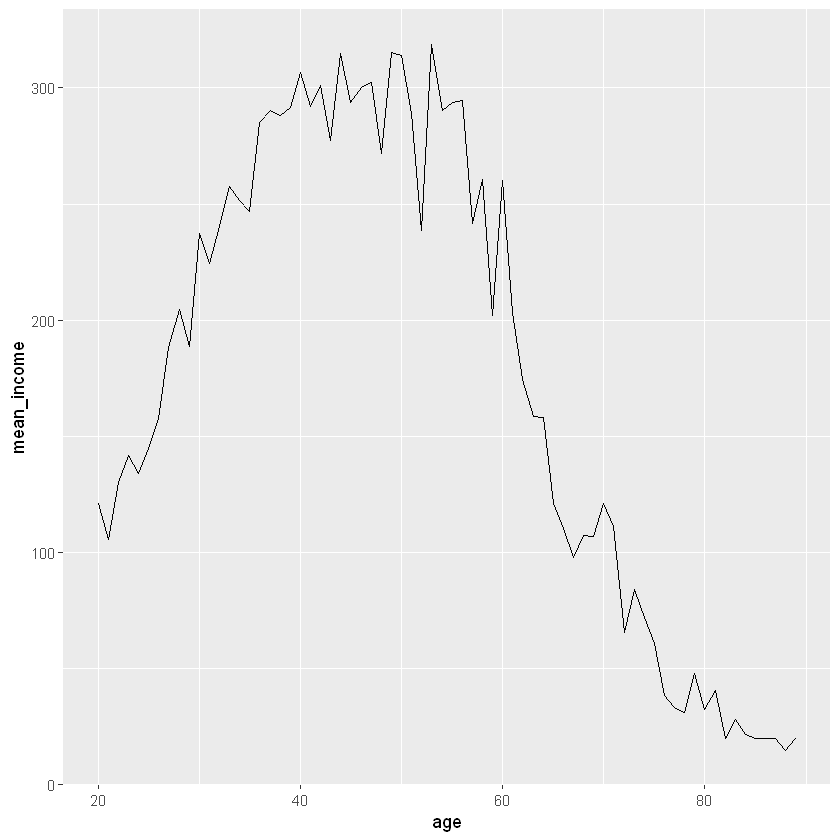

In [43]:
ggplot(data = age_income, aes(x=age, y=mean_income)) + geom_line()

In [ ]:
welfare$age

### 3. 연령대 별 월급
2020.07.15

In [73]:
## 변수검토, 전처리
## age : 임의로 만든 변수
welfare <- welfare %>% 
mutate(ageg = ifelse(age < 30, 'young',
                    ifelse(age <=59, 'middle', 'old')))

In [26]:
table(welfare$ageg)


middle    old  young 
  6049   6281   4334 

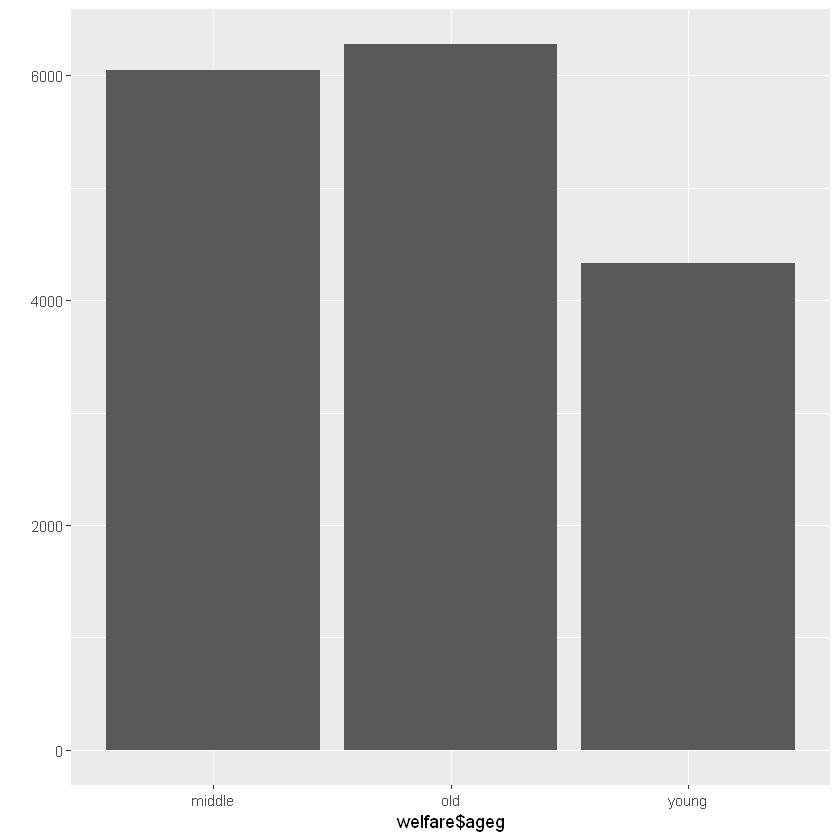

In [27]:
qplot(welfare$ageg)

In [74]:
## 연령대별 월급 평균표 만들기
ageg_income <- welfare %>% 
filter(!is.na(income)) %>% 
group_by(ageg) %>% 
summarise(mean_income = mean(income))

ageg_income

`summarise()` ungrouping output (override with `.groups` argument)



ageg,mean_income
<chr>,<dbl>
middle,281.8871
old,125.3295
young,163.5953


In [33]:
head(welfare,3)
tail(welfare,3)

,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,code_region,h10_din,h10_cin,⋯,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5,age,ageg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,1,10101,0,NA,1,1,864,864,⋯,NA,NA,NA,NA,NA,NA,0,NA,80,old
2,2,1,1,20101,0,NA,1,1,600,600,⋯,NA,NA,NA,NA,NA,NA,0,NA,71,old
3,3,1,1,30101,0,NA,1,1,1571,1619,⋯,NA,NA,NA,NA,1440,NA,0,NA,68,old


,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,code_region,h10_din,h10_cin,⋯,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5,age,ageg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
16662,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,700,NA,0,NA,21,young
16663,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,0,NA,18,young
16664,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,0,NA,15,young


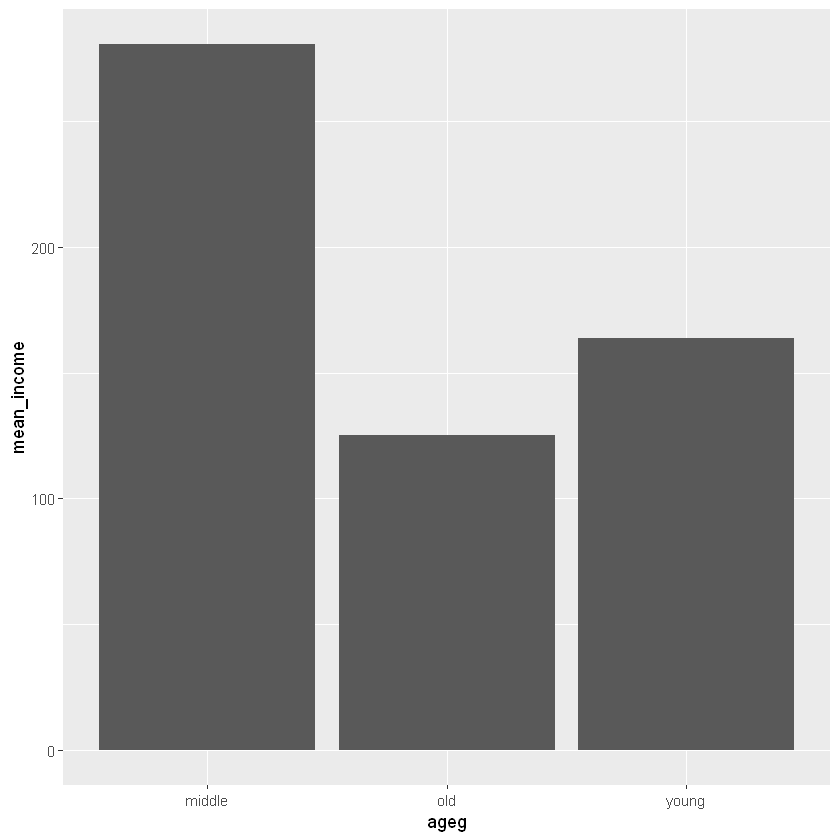

In [32]:
ggplot(data = ageg_income, aes(x=ageg, y=mean_income)) + geom_col()

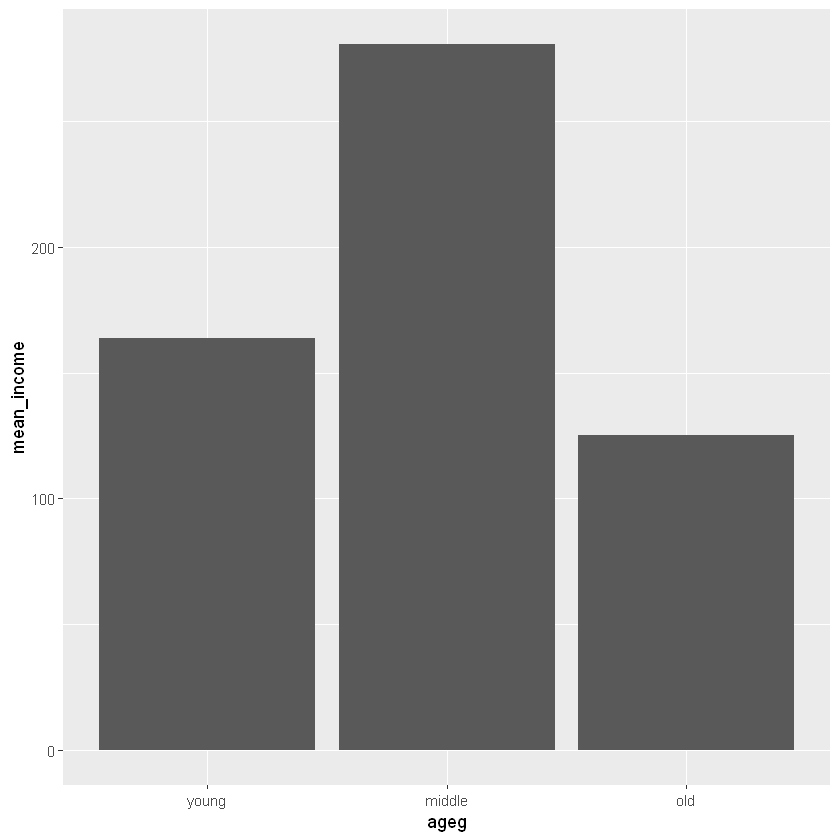

In [34]:
## 순서대로 막대 정렬
ggplot(data = ageg_income, aes(x=ageg, y=mean_income)) + geom_col() +
scale_x_discrete(limits = c('young', 'middle', 'old'))

### 4. 연령대 및 성별 월급 차이

In [75]:
sex_income <- welfare %>% 
filter(!is.na(income)) %>% 
group_by(ageg, sex) %>% 
summarise(mean_income = mean(income))

`summarise()` regrouping output by 'ageg' (override with `.groups` argument)



In [36]:
sex_income

ageg,sex,mean_income
<chr>,<dbl>,<dbl>
middle,1,353.07574
middle,2,186.16309
old,1,173.85558
old,2,81.52917
young,1,170.81737
young,2,159.50518


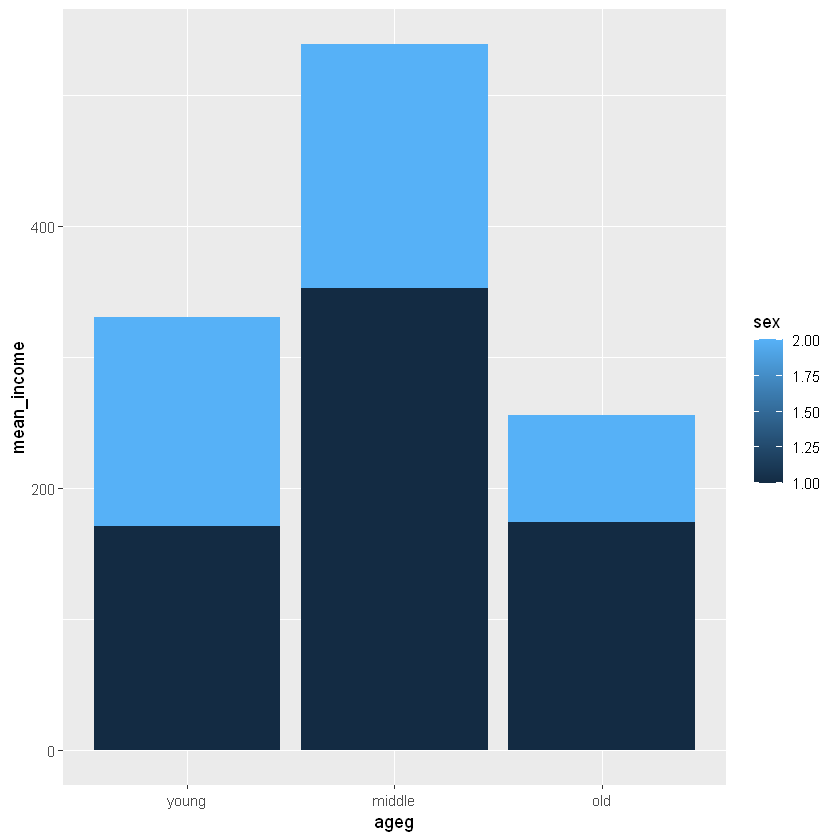

In [38]:
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) + 
geom_col() + scale_x_discrete(limits = c('young', 'middle', 'old'))

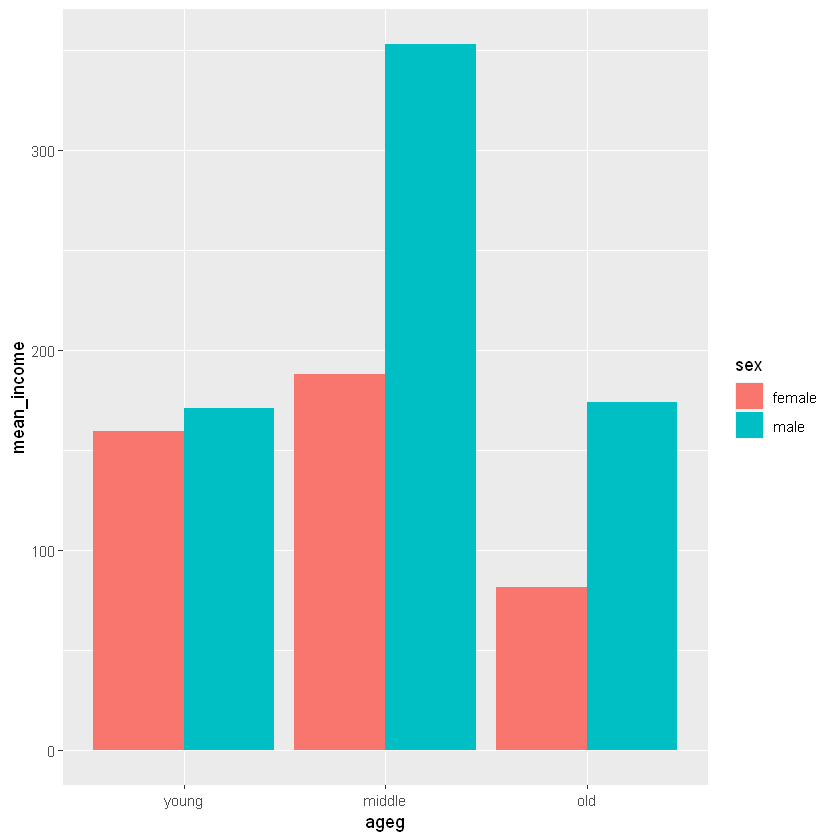

In [76]:
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) + 
geom_col(position = 'dodge') + 
scale_x_discrete(limits = c('young', 'middle', 'old'))

In [78]:
## 연령별 성별 월급 차이 
sex_age <- welfare %>% 
filter(!is.na(income)) %>% 
group_by(age, sex) %>%
summarise(mean_income = mean(income))
head(sex_age)

`summarise()` regrouping output by 'age' (override with `.groups` argument)



age,sex,mean_income
<dbl>,<chr>,<dbl>
20,female,147.4500
20,male,69.0000
21,female,106.9789
21,male,102.0500
22,female,139.8547
22,male,118.2379


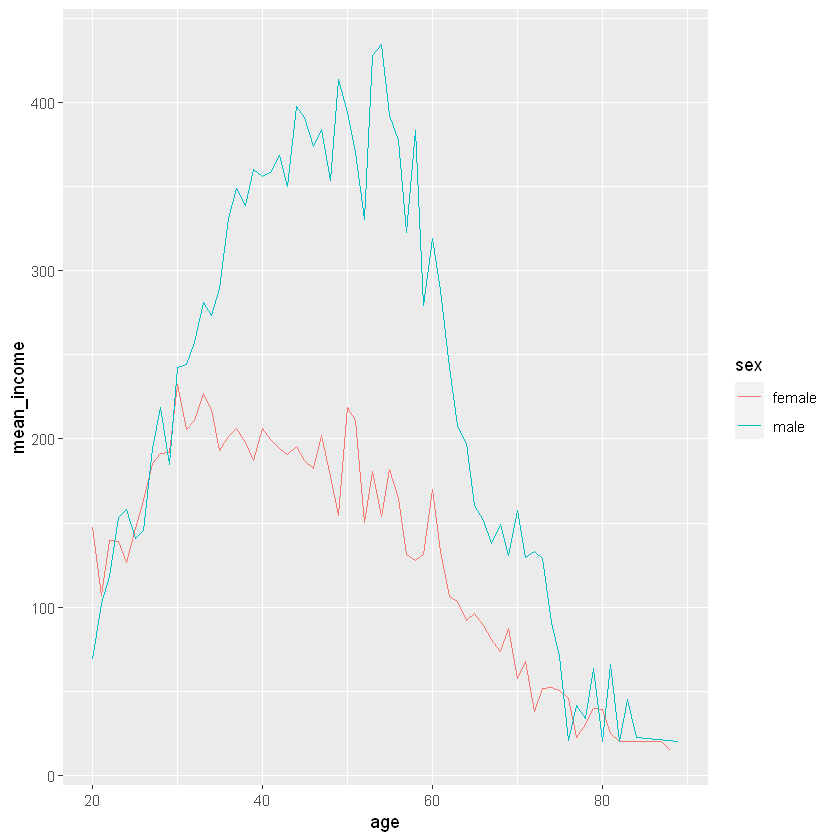

In [79]:
ggplot(data = sex_age, aes(x = age, y = mean_income, col = sex)) + geom_line()

### 5. 직업별 월급

In [83]:
class(welfare$code_job)
table(welfare$code_job)

[1] "numeric"


 111  120  131  132  133  134  135  139  141  149  151  152  153  159  211  212 
   2   16   10   11    9    3    7   10   35   20   26   18   15   16    8    4 
 213  221  222  223  224  231  232  233  234  235  236  237  239  241  242  243 
   3   17   31   12    4   41    5    3    6   48   14    2   29   12    4   63 
 244  245  246  247  248  251  252  253  254  259  261  271  272  273  274  281 
   4   33   59   77   38   14  111   24   67  109    4   15   11    4   36   17 
 283  284  285  286  289  311  312  313  314  320  330  391  392  399  411  412 
   8   10   26   16    5  140  260  220   84   75   15    4   13   87   47   12 
 421  422  423  429  431  432  441  442  510  521  522  530  611  612  613  620 
 124   71    5   14   20   33  154  197  192  353    5  106 1320   11   40    2 
 630  710  721  722  730  741  742  743  751  752  753  761  762  771  772  773 
  20   29   30   22   16   27    3   34   34    5   49   69   27   11   61   86 
 774  780  791  792  799  8

In [94]:
## readxl : excel 읽는 라이브러리
## read_excel(sheet : 엑셀페이지)
library(readxl)
list_job <- read_excel('lecture/RMD/koweps_codebook.xlsx', col_names = T, sheet = 2)
list_job

code_job,job
<dbl>,<chr>
111,의회의원 고위공무원 및 공공단체임원
112,기업고위임원
120,행정 및 경영지원 관리자
131,연구 교육 및 법률 관련 관리자
132,보험 및 금융 관리자
133,보건 및 사회복지 관련 관리자
134,문화 예술 디자인 및 영상 관련 관리자
135,정보통신관련 관리자
139,기타 전문서비스 관리자


In [ ]:
head(welfare['code_job'],20)

In [95]:
## welfare에 직업명 병합
## left_join : id 변수를 기준으로 welfare에 list_job을 병합. list_job 값이 없어도 병합됨.
## inner_join : id 변수를 기준으로 있는 거만 가져옴.
welfare <- left_join(welfare, list_job, id = 'code_job')

Joining, by = c("code_job", "job")



In [ ]:
str(welfare)

In [92]:
welfare %>% 
filter(!is.na(code_job)) %>% 
select(code_job, job) %>% 
head(10)

,code_job,job
,<dbl>,<chr>
1,942,경비원 및 검표원
2,762,전기공
3,530,방문 노점 및 통신 판매 관련 종사자
4,999,기타 서비스관련 단순 종사원
5,312,경영관련 사무원
6,254,문리 기술 및 예능 강사
7,510,영업 종사자
8,530,방문 노점 및 통신 판매 관련 종사자
9,286,스포츠 및 레크레이션 관련 전문가


In [97]:
job_income <- welfare %>% 
filter(!is.na(job) & !is.na(income)) %>% 
group_by(job) %>% 
summarise(mean_income = mean(income))

head(job_income)

`summarise()` ungrouping output (override with `.groups` argument)



job,mean_income
<chr>,<dbl>
가사 및 육아 도우미,80.16648
간호사,240.68127
건설 및 광업 단순 종사원,190.12974
건설 및 채굴 기계운전원,357.97000
건설 전기 및 생산 관련 관리자,535.80556
건설관련 기능 종사자,246.63214


In [98]:
## mean_income 내림차순으로 정렬 후 상위 10개 직종 추출
top10 <- job_income %>% 
arrange(desc(mean_income)) %>% 
head(10)

top10

job,mean_income
<chr>,<dbl>
금속 재료 공학 기술자 및 시험원,845.0667
의료진료 전문가,843.6429
의회의원 고위공무원 및 공공단체임원,750.0000
보험 및 금융 관리자,726.1800
제관원 및 판금원,572.4067
행정 및 경영지원 관리자,563.7633
문화 예술 디자인 및 영상 관련 관리자,557.4667
연구 교육 및 법률 관련 관리자,549.9125
건설 전기 및 생산 관련 관리자,535.8056


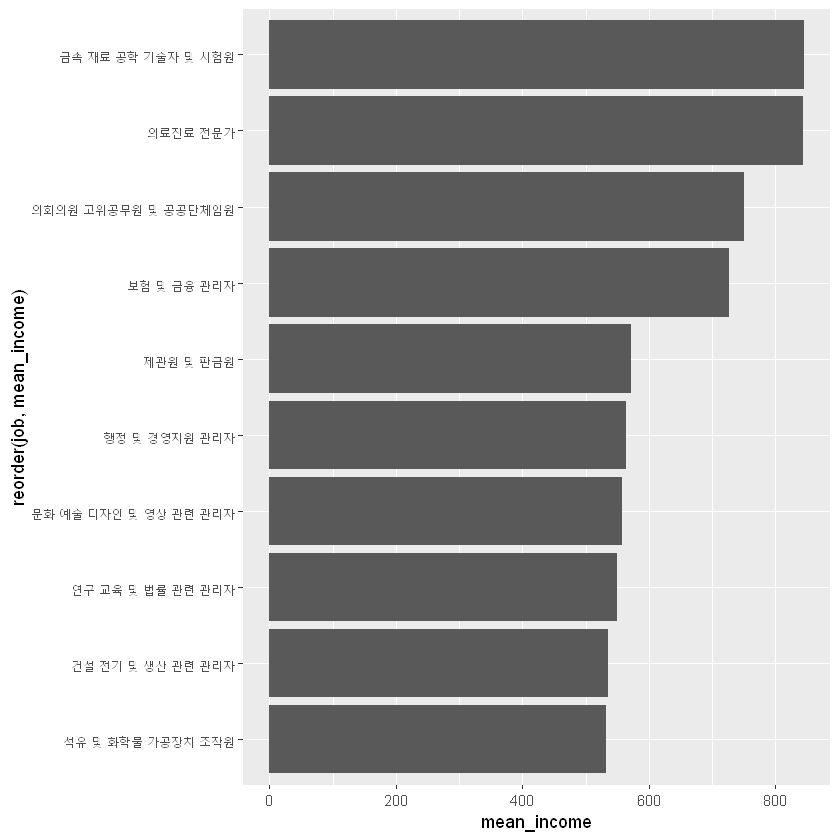

In [102]:
ggplot(data = top10, aes(x = reorder(job, mean_income), y = mean_income)) + geom_col() +
coord_flip()

In [103]:
## mean_income 오름차순대로 상위 10개 -> 하위 10개 직종 추출
bottom10 <- job_income %>% 
arrange(mean_income) %>% 
head(10)

bottom10

job,mean_income
<chr>,<dbl>
가사 및 육아 도우미,80.16648
임업관련 종사자,83.33000
기타 서비스관련 단순 종사원,88.22101
청소원 및 환경 미화원,88.78775
약사 및 한약사,89.00000
작물재배 종사자,92.00000
농립어업관련 단순 종사원,101.58125
의료 복지 관련 서비스 종사자,103.52643
음식관련 단순 종사원,107.84511


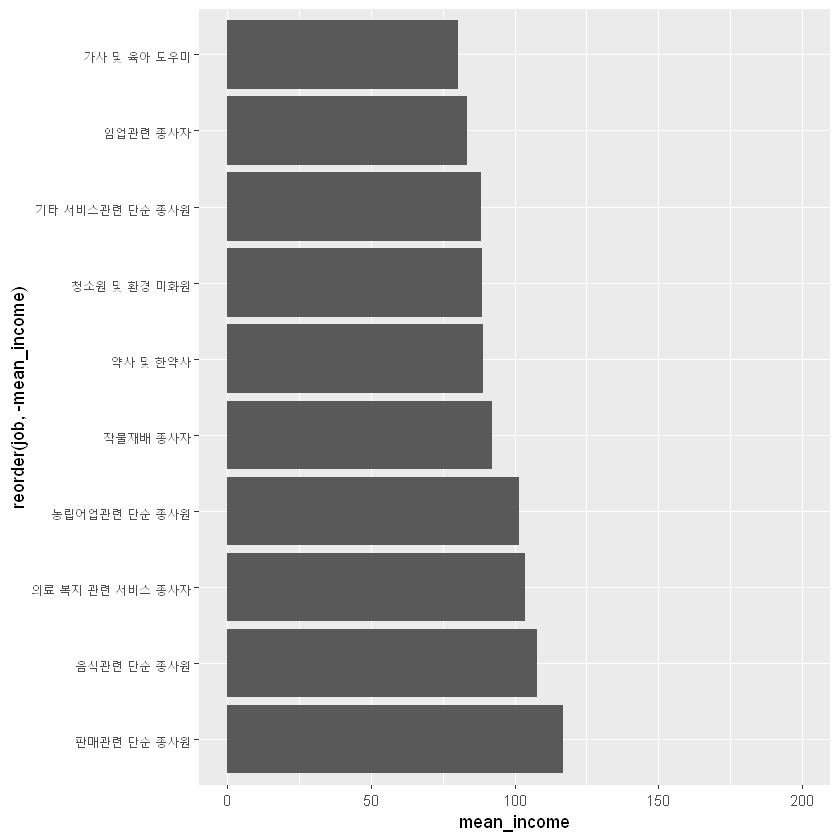

In [115]:
ggplot(data = bottom10, aes(x = reorder(job, -mean_income), y = mean_income)) + geom_col() +
coord_flip() + ylim(0, 200)

### 6. 성별 직업 빈도

In [166]:
## 남성 직업 빈도 상위 10개 추출.
job_male <- welfare %>% 
filter(!is.na(job) & sex == 'male') %>% 
group_by(job) %>% 
summarise(count = n()) %>% 
arrange(desc(count)) %>% 
head(15)

job_male

`summarise()` ungrouping output (override with `.groups` argument)



job,count
<chr>,<int>
작물재배 종사자,640
자동차 운전원,251
경영관련 사무원,213
영업 종사자,141
매장 판매 종사자,132
제조관련 단순 종사원,104
청소원 및 환경 미화원,97
건설 및 광업 단순 종사원,95
경비원 및 검표원,95


In [167]:
job_female <- welfare %>% 
filter(!is.na(job) & sex == 'female') %>% 
group_by(job) %>% 
summarise(count = n()) %>% 
arrange(desc(count)) %>% 
head(15)

job_female

`summarise()` ungrouping output (override with `.groups` argument)



job,count
<chr>,<int>
작물재배 종사자,680
청소원 및 환경 미화원,228
매장 판매 종사자,221
제조관련 단순 종사원,185
회계 및 경리 사무원,176
음식서비스 종사자,149
주방장 및 조리사,126
가사 및 육아 도우미,125
의료 복지 관련 서비스 종사자,121


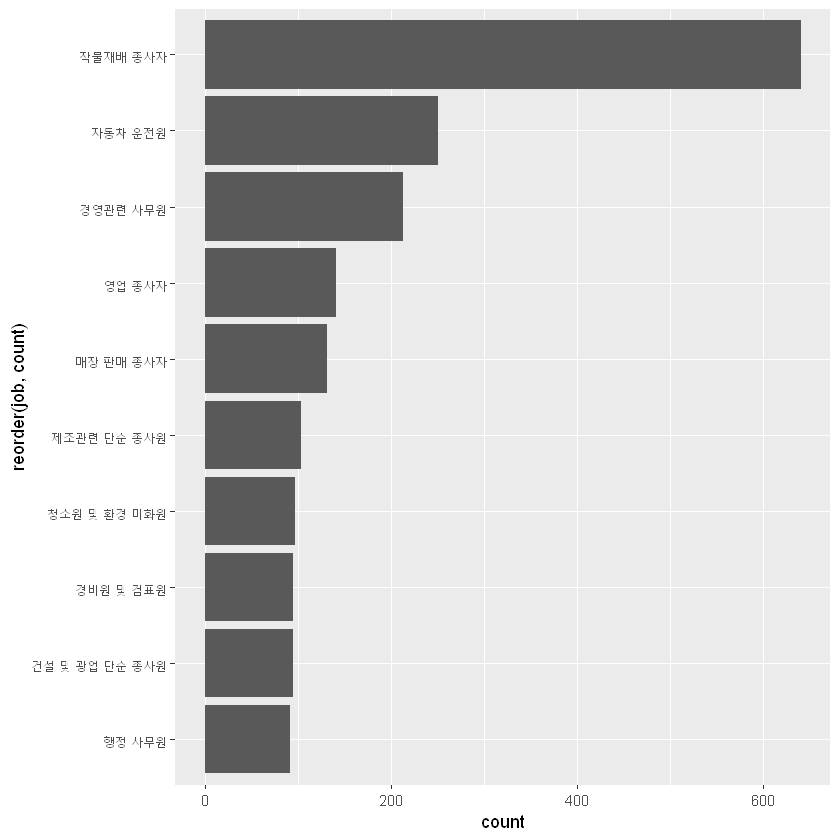

In [140]:
ggplot(data = job_male, aes(x=reorder(job,count), y = count)) + geom_col() + coord_flip()

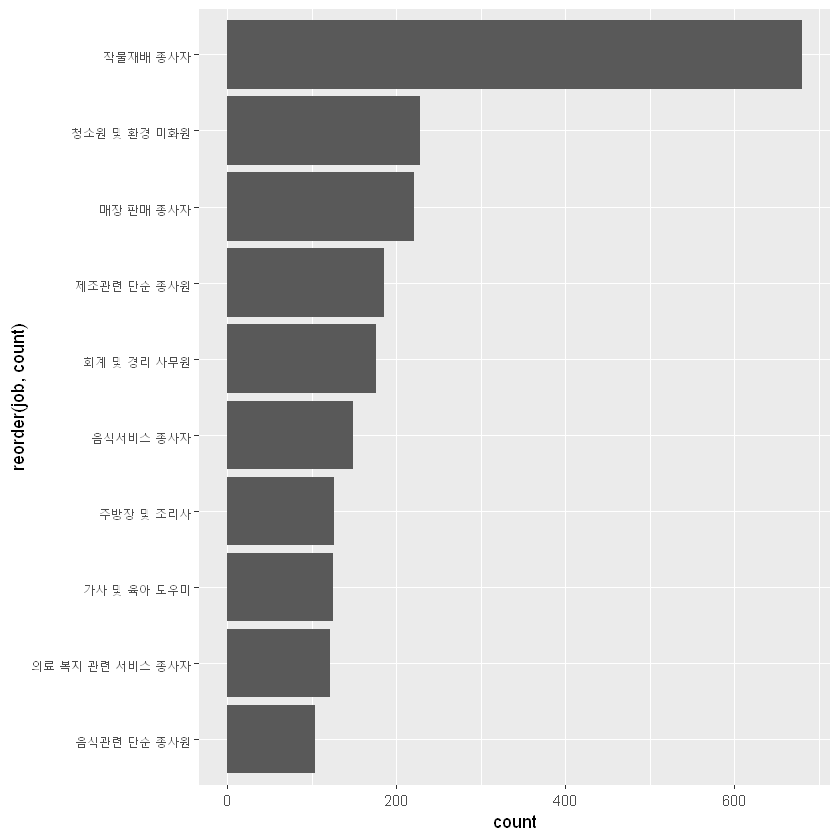

In [141]:
ggplot(data = job_female, aes(x = reorder(job, count), y = count)) + geom_col() + coord_flip()

### 7. 종교 유무에 따른 이혼율

In [168]:
class(welfare$religion)
table(welfare$religion)

[1] "numeric"


   1    2 
8047 8617 

In [169]:
welfare$religion  <- ifelse(welfare$religion ==1, 'yes', 'no')
table(welfare$religion)


  no  yes 
8617 8047 

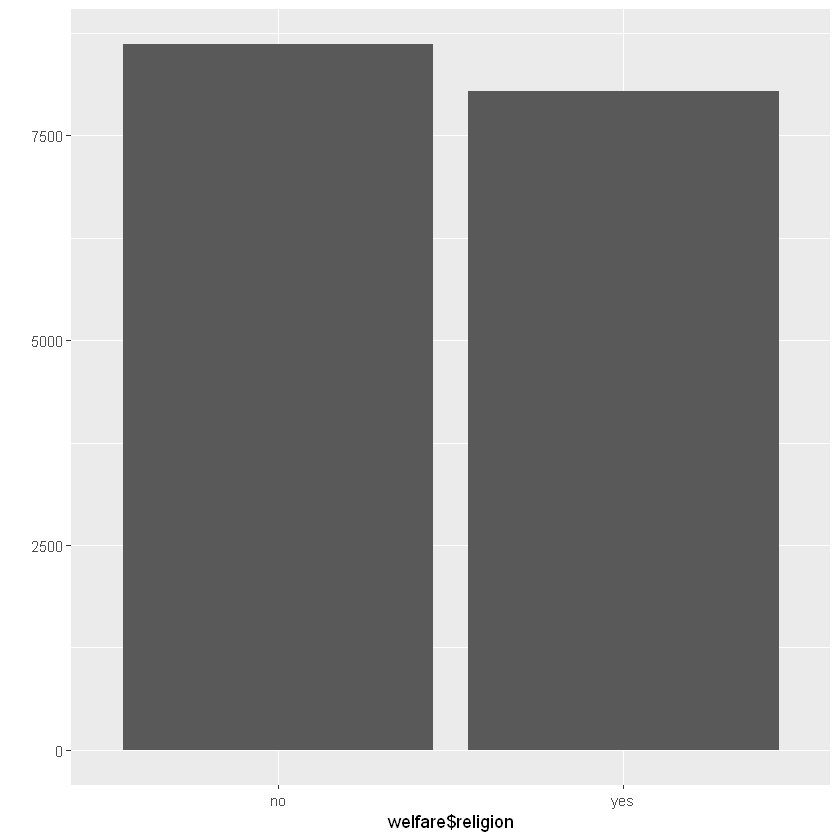

In [171]:
qplot(welfare$religion)

In [173]:
class(welfare$marriage)
table(welfare$marriage)

[1] "numeric"


   0    1    2    3    4    5    6 
2861 8431 2117  712   84 2433   26 

In [181]:
welfare$group_marriage <- ifelse(welfare$marriage == 1, 'marriage',
                            ifelse(welfare$marriage == 3, 'divorce',NA))

table(welfare$group_marriage)
table(is.na(welfare$group_marriage))


 divorce marriage 
     712     8431 


FALSE  TRUE 
 9143  7521 

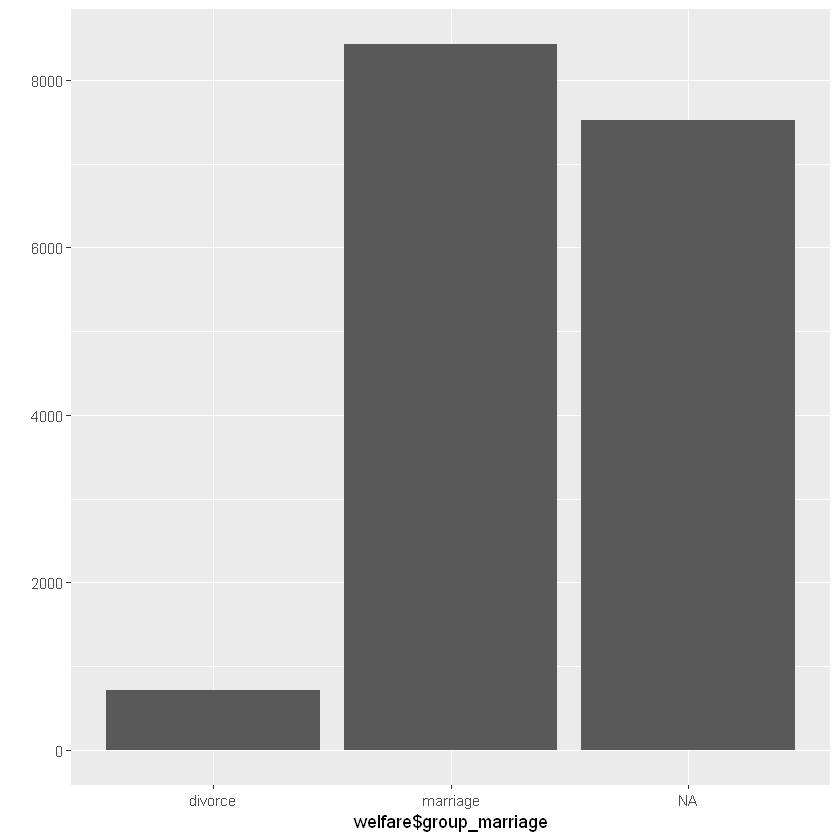

In [182]:
qplot(welfare$group_marriage)

In [191]:
## 종교유무에 따른 이혼율 표 만들기
## 종교끼리 sum
## round() : 소수점 처리
religion_marriage <- welfare %>% 
    filter(!is.na(group_marriage)) %>% 
    group_by(religion, group_marriage) %>% 
    summarise(n = n()) %>% 
    mutate(tot_group = sum(n)) %>% 
    mutate(pct = round(n/tot_group*100, 1))

`summarise()` regrouping output by 'religion' (override with `.groups` argument)



In [192]:
religion_marriage

religion,group_marriage,n,tot_group,pct
<chr>,<chr>,<int>,<int>,<dbl>
no,divorce,384,4602,8.3
no,marriage,4218,4602,91.7
yes,divorce,328,4541,7.2
yes,marriage,4213,4541,92.8


In [194]:
religion_marriage <- welfare %>% 
filter(!is.na(group_marriage)) %>% 
count(religion, group_marriage) %>% 
group_by(religion) %>% 
mutate(pct = round(n/sum(n)*100, 1))

religion_marriage

religion,group_marriage,n,pct
<chr>,<chr>,<int>,<dbl>
no,divorce,384,8.3
no,marriage,4218,91.7
yes,divorce,328,7.2
yes,marriage,4213,92.8


In [197]:
## 이혼율 표
divorce <- religion_marriage %>% 
filter(group_marriage == 'divorce') %>% 
select(religion, pct)

divorce

religion,pct
<chr>,<dbl>
no,8.3
yes,7.2


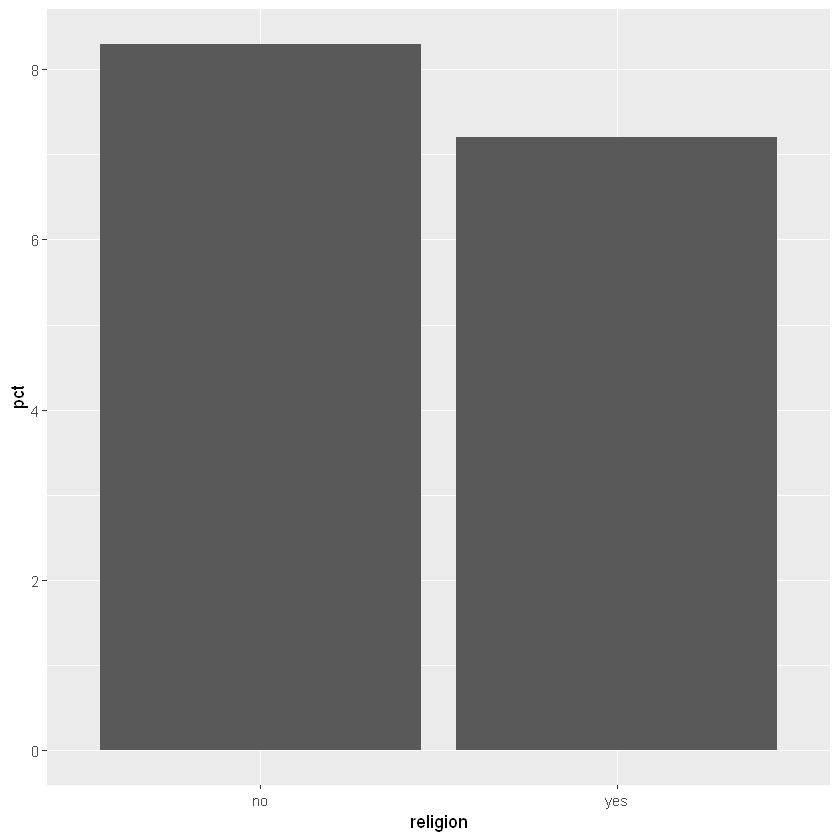

In [198]:
ggplot(data = divorce, aes(x = religion, y = pct)) + geom_col()

In [199]:
## 연령대별 결혼, 이혼율 표
ageg_marriage <- welfare %>% 
filter(!is.na(group_marriage)) %>% 
group_by(ageg, group_marriage) %>% 
summarise(n = n()) %>% 
mutate(tot_group = sum(n)) %>% 
mutate(pct = round(n/tot_group*100, 1))

ageg_marriage

`summarise()` regrouping output by 'ageg' (override with `.groups` argument)



ageg,group_marriage,n,tot_group,pct
<chr>,<chr>,<int>,<int>,<dbl>
middle,divorce,437,4918,8.9
middle,marriage,4481,4918,91.1
old,divorce,273,4165,6.6
old,marriage,3892,4165,93.4
young,divorce,2,60,3.3
young,marriage,58,60,96.7


In [201]:
ageg_marriage <- welfare %>% 
filter(!is.na(group_marriage)) %>% 
count(ageg, group_marriage) %>% 
group_by(ageg) %>% 
mutate(pct = round(n/sum(n)*100, 1))

ageg_marriage

ageg,group_marriage,n,pct
<chr>,<chr>,<int>,<dbl>
middle,divorce,437,8.9
middle,marriage,4481,91.1
old,divorce,273,6.6
old,marriage,3892,93.4
young,divorce,2,3.3
young,marriage,58,96.7


In [202]:
ageg_divorce <- ageg_marriage %>% 
filter(ageg != 'young' & group_marriage == 'divorce') %>% 
select(ageg, pct)

ageg_divorce

ageg,pct
<chr>,<dbl>
middle,8.9
old,6.6


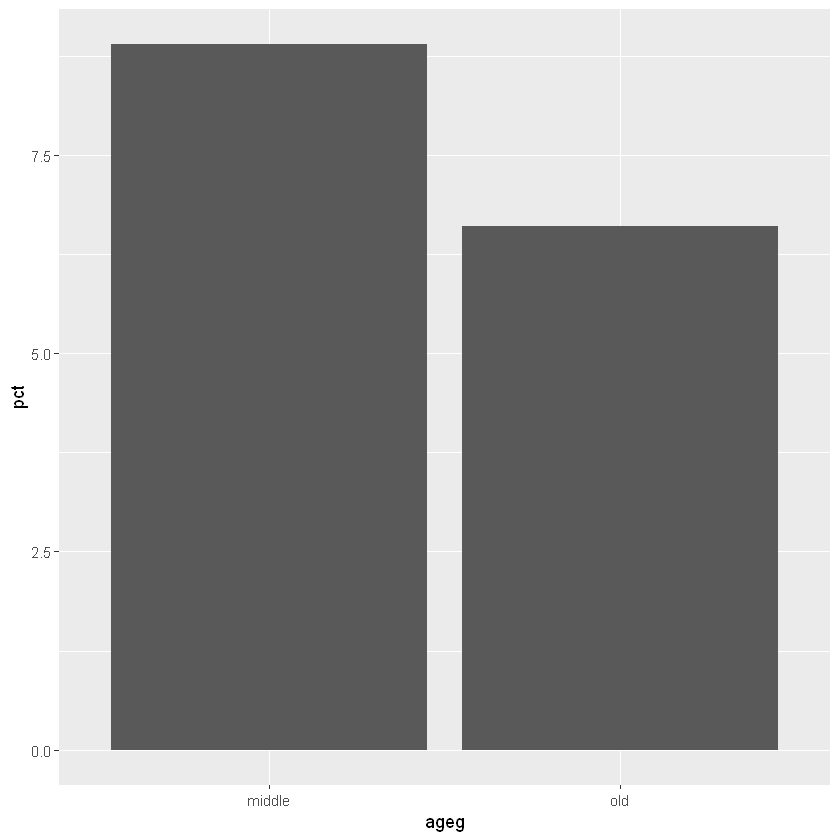

In [203]:
ggplot(data = ageg_divorce, aes(x = ageg, y = pct)) + geom_col()

In [204]:
## 연령대, 종교유무에 따른 결혼,이혼율
ageg_religion_marriage <- welfare %>% 
filter(!is.na(group_marriage) & ageg !='young') %>% 
group_by(ageg, religion, group_marriage) %>% 
summarise(n = n()) %>% 
mutate(tot_group = sum(n)) %>% 
mutate(pct = round(n/tot_group*100, 1))

ageg_religion_marriage

`summarise()` regrouping output by 'ageg', 'religion' (override with `.groups` argument)



ageg,religion,group_marriage,n,tot_group,pct
<chr>,<chr>,<chr>,<int>,<int>,<dbl>
middle,no,divorce,260,2681,9.7
middle,no,marriage,2421,2681,90.3
middle,yes,divorce,177,2237,7.9
middle,yes,marriage,2060,2237,92.1
old,no,divorce,123,1884,6.5
old,no,marriage,1761,1884,93.5
old,yes,divorce,150,2281,6.6
old,yes,marriage,2131,2281,93.4


In [208]:
ageg_religion_marriage <- welfare %>% 
filter(!is.na(group_marriage) & ageg != 'young') %>% 
count(ageg, religion, group_marriage) %>%
group_by(ageg, religion) %>% 
mutate(pct = round(n/sum(n)*100, 1))

ageg_religion_marriage

ageg,religion,group_marriage,n,pct
<chr>,<chr>,<chr>,<int>,<dbl>
middle,no,divorce,260,9.7
middle,no,marriage,2421,90.3
middle,yes,divorce,177,7.9
middle,yes,marriage,2060,92.1
old,no,divorce,123,6.5
old,no,marriage,1761,93.5
old,yes,divorce,150,6.6
old,yes,marriage,2131,93.4


In [210]:
## 연령대 종교 유무별 이혼율 표
df_divorce <- ageg_religion_marriage %>% 
filter(group_marriage == 'divorce') %>% 
select(ageg, religion, pct)

df_divorce

ageg,religion,pct
<chr>,<chr>,<dbl>
middle,no,9.7
middle,yes,7.9
old,no,6.5
old,yes,6.6


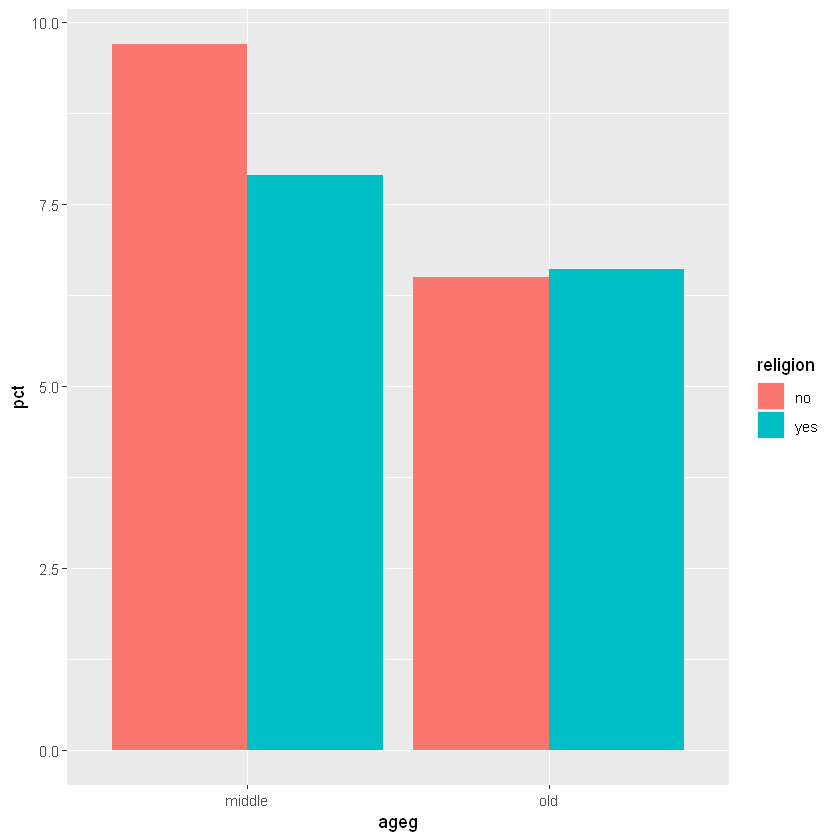

In [211]:
ggplot(data = df_divorce, aes(x = ageg, y = pct, fill = religion)) + 
geom_col(position = 'dodge')

### 8. 지역별 연령대 비율

In [212]:
## 1. 변수 검토하기
class(welfare$code_region)
table(welfare$code_region)

[1] "numeric"


   1    2    3    4    5    6    7 
2486 3711 2785 2036 1467 1257 2922 

In [213]:
## 2. 전처리 : 지역코드 목록 만들기
list_region <- data.frame(code_region = c(1:7),
                         region = c('서울', '수도권(인천/경기)','부산/경남/울산','대구/경북','대전/충남',
                                   '강원/충북','광주/전남/전북/제주도'))
list_region

code_region,region
<int>,<chr>
1,서울
2,수도권(인천/경기)
3,부산/경남/울산
4,대구/경북
5,대전/충남
6,강원/충북
7,광주/전남/전북/제주도


In [219]:
## welfare에 지역명 변수추가
welfare <- left_join(welfare, list_region, id = 'code_region')
# welfare <- welfare %>% left_join(list_region, by = 'code_region')

Joining, by = c("code_region", "region")



In [222]:
welfare %>% 
select(code_region, region) %>% 
tail

,code_region,region
,<dbl>,<chr>
16659,5,대전/충남
16660,5,대전/충남
16661,5,대전/충남
16662,5,대전/충남
16663,5,대전/충남
16664,5,대전/충남


In [223]:
## 지역별 연령대 비율
region_ageg <- welfare %>% 
group_by(region, ageg) %>% 
summarise(n = n()) %>% 
mutate(tot_group = sum(n)) %>% 
mutate(pct = round(n/tot_group*100, 2))

`summarise()` regrouping output by 'region' (override with `.groups` argument)



In [224]:
head(region_ageg)

region,ageg,n,tot_group,pct
<chr>,<chr>,<int>,<int>,<dbl>
강원/충북,middle,417,1257,33.17
강원/충북,old,555,1257,44.15
강원/충북,young,285,1257,22.67
광주/전남/전북/제주도,middle,947,2922,32.41
광주/전남/전북/제주도,old,1233,2922,42.20
광주/전남/전북/제주도,young,742,2922,25.39


In [226]:
region_ageg <- welfare %>% 
count(region, ageg) %>% 
group_by(region) %>% 
mutate(pct = round(n/sum(n)*100, 2))
head(region_ageg)

region,ageg,n,pct
<chr>,<chr>,<int>,<dbl>
강원/충북,middle,417,33.17
강원/충북,old,555,44.15
강원/충북,young,285,22.67
광주/전남/전북/제주도,middle,947,32.41
광주/전남/전북/제주도,old,1233,42.20
광주/전남/전북/제주도,young,742,25.39


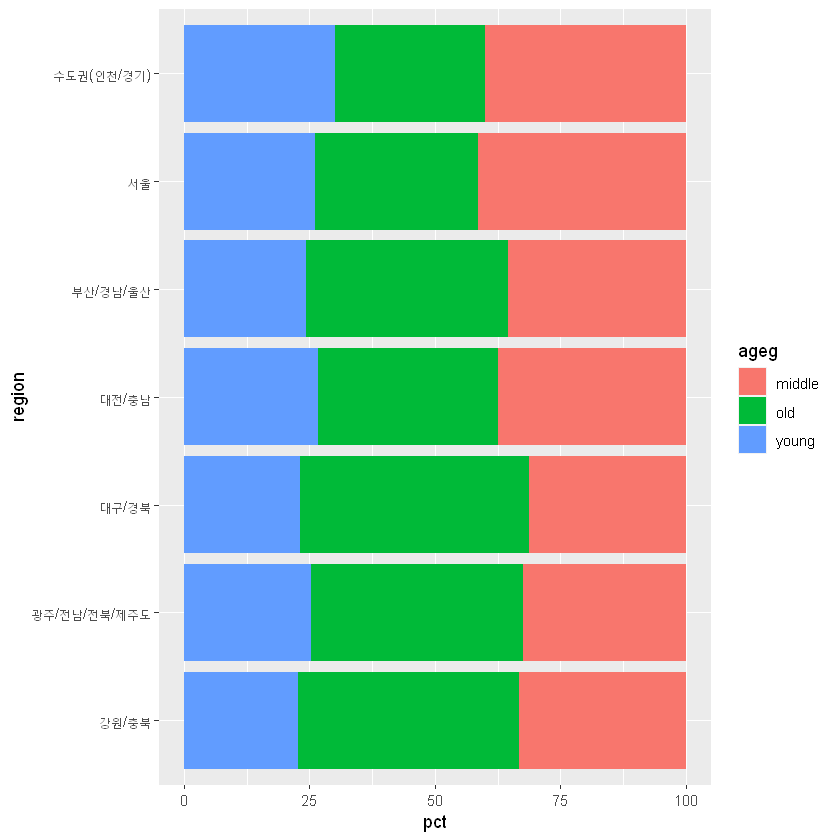

In [227]:
ggplot(data = region_ageg, aes(x = region, y = pct, fill = ageg)) + geom_col() + 
coord_flip()

In [230]:
## 노년층 비율 높은 순
list_order_old <- region_ageg %>% 
filter(ageg == 'old') %>% 
arrange(desc(pct))

list_order_old

region,ageg,n,pct
<chr>,<chr>,<int>,<dbl>
대구/경북,old,928,45.58
강원/충북,old,555,44.15
광주/전남/전북/제주도,old,1233,42.20
부산/경남/울산,old,1124,40.36
대전/충남,old,527,35.92
서울,old,805,32.38
수도권(인천/경기),old,1109,29.88


In [229]:
order <- list_order_old$region
order

[1] "수도권(인천/경기)"     "서울"                  "대전/충남"            
[4] "부산/경남/울산"        "광주/전남/전북/제주도" "강원/충북"            
[7] "대구/경북"

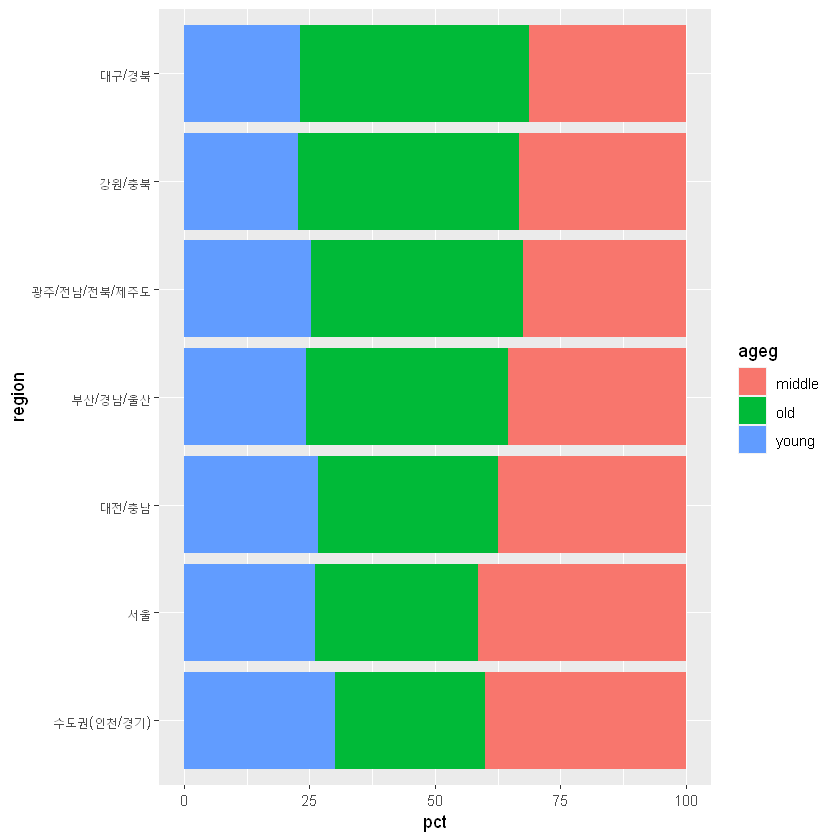

In [231]:
ggplot(data = region_ageg, aes(x = region, y = pct, fill = ageg)) + 
geom_col() + 
coord_flip() + 
scale_x_discrete(limits = order)

In [235]:
## 연령대 순으로 막대 색깔 나열하기
class(region_ageg$ageg)
levels(region_ageg$ageg)
region_ageg$ageg <- factor(region_ageg$ageg, level = c('old','middle','young'))

[1] "factor"

[1] "old"    "middle" "young"

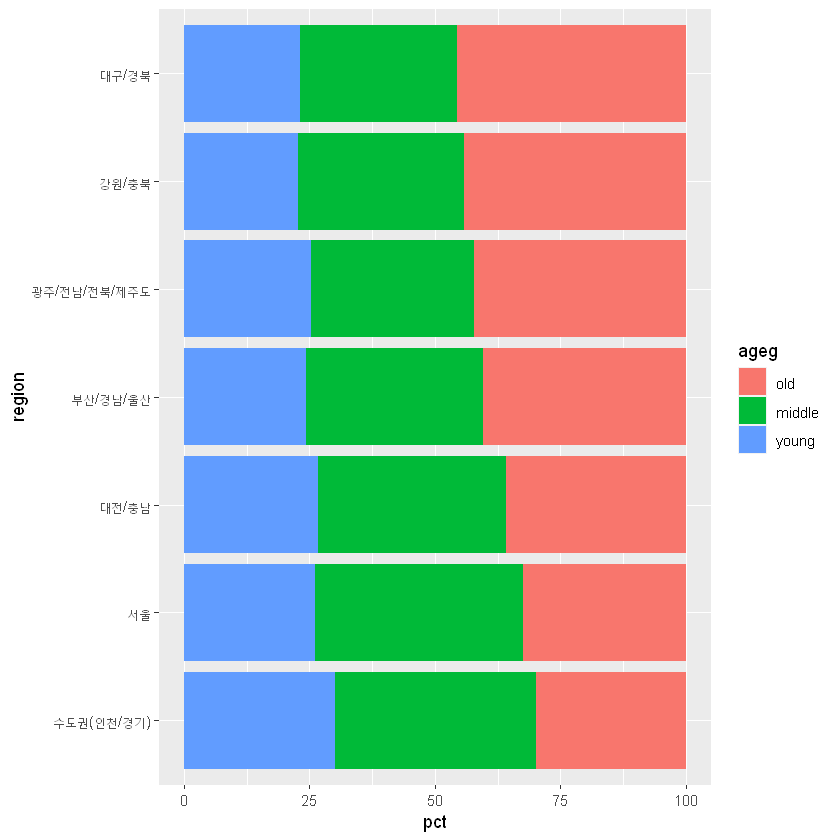

In [236]:
ggplot(data = region_ageg, aes(x = region, y = pct, fill = ageg)) +
geom_col() + 
coord_flip() + 
scale_x_discrete(limits = order)